## Classify Reuters newswires into 46 mutually exclusive topics
This is a single label, multiclass classification.

Deep Learning with Python by Francois Chollet

In [5]:
from keras.datasets import reuters
import numpy as np

In [2]:
# The argument 'num_words=10000' restricts the data to the 10,000 msot frequently occurring words found in the data.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
# 8,982 training examples and 2,246 test examples
print(len(train_data))
print(len(test_data))

8982
2246


## Preparing the data

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    re = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        re[i, sequence] = 1.
    return re.astype('float32')

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
# There are multiple possible labels, and each news article is labeled with only one.
# Use one-hot encoding.
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Building the network
There are $46$ possible categories. So we want to use layers with more than $46$ units.\
Let's go with $64$ units per layer.

In [14]:
from keras import models
from keras import layers

'''
layers with: 10000[=input], 64, 64, 46[=output]
For each sample, the network will output a 46-dimensional vector.
'''
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [15]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Training & Validation
Set apart 1,000 samples in the training data to use as a validation set.

In [18]:
x_validation = x_train[:1000]
x_training = x_train[1000:]

y_validation = one_hot_train_labels[:1000]
y_training = one_hot_train_labels[1000:]

In [21]:
history = model.fit(x_training, y_training, 
                     epochs=20, batch_size=512,
                     validation_data=(x_validation, y_validation))

Epoch 1/20
16/16 [==============================] - 0s 19ms/step - loss: 0.1079 - accuracy: 0.9578 - val_loss: 1.1541 - val_accuracy: 0.7940
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 0.1069 - accuracy: 0.9599 - val_loss: 1.1123 - val_accuracy: 0.7960
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 0.1040 - accuracy: 0.9593 - val_loss: 1.1284 - val_accuracy: 0.7910
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.1004 - accuracy: 0.9585 - val_loss: 1.1922 - val_accuracy: 0.7940
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.1051 - accuracy: 0.9587 - val_loss: 1.1686 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.1001 - accuracy: 0.9570 - val_loss: 1.1957 - val_accuracy: 0.7920
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.1010 - accuracy: 0.9584 - val_loss: 1.1504 - val_accuracy: 0.8030
Epoch 8/20
16

In [22]:
loss_values = history.history['loss']               # training loss
val_loss_values = history.history['val_loss']       # validation loss
acc_values = history.history['accuracy']            # training accuracy 
val_acc_values = history.history['val_accuracy']    # validation accuracy

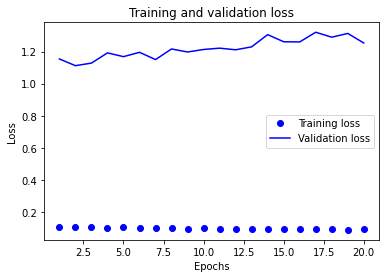

In [23]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc_values) +1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

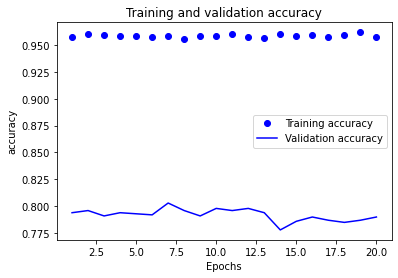

In [24]:
plt.clf()

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [25]:
# evaludate() returns [loss, accuracy]
model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.4504 - accuracy: 0.7858


[1.450442910194397, 0.7858415246009827]

## Use a trained network to predict
Use a trained network to generate predictions on new data\
For multiclass classification, the predicted category is the one with largest probability.

In [36]:
prediction = model.predict(x_test)

In [37]:
# sum of probability distribution is one.
np.sum(prediction[0])

1.0

In [38]:
print(np.max(prediction[0]))
print(np.argmax(prediction[0]))

0.98978615
3
